# GRIP : The Sparks Foundation
Data Science and Business Analytics Intern

Task 5- Exploratory Data Analysis - Sports

# Importing the required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import os
import mpl_toolkits
import json
print('Libraries are imported Successfully')


Libraries are imported Successfully


In [4]:
df_matches=pd.read_csv("C:\\Users\\Asus Bq512TS\\Documents\\deliveries .csv",low_memory=False)
print('Data Read Successfully')

Data Read Successfully


In [5]:
df_deliveries=pd.read_csv("C:\\Users\\Asus Bq512TS\\Documents\\matches .csv")

In [6]:
df_matches

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [7]:
df_deliveries

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# data pre processing 

In [8]:
df_matches.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
df_matches.tail()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [17]:
print(df_matches.columns)


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [18]:
print(df_matches.head())


   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0        

In [19]:

unique_teams = df_deliveries['team1'].unique()



In [20]:
df_deliveries['team2'].unique()


array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [21]:
df_matches['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [22]:
df_matches['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [23]:
df_matches.replace({
    'Royal Challengers Bangalore': 'RCB',
    'Sunrisers Hyderabad': 'SRH',
    'Rising Pune Supergiant': 'RPS',
    'Mumbai Indians': 'MI',
    'Kolkata Knight Riders': 'KKR',
    'Gujarat Lions': 'GL',
    'Kings XI Punjab': 'KXIP',
    'Delhi Daredevils': 'DD',
    'Chennai Super Kings': 'CSK',
    'Rajasthan Royals': 'RR',
    'Deccan Chargers': 'DC',
    'Kochi Tuskers Kerala': 'KTK',
    'Pune Warriors': 'PW',
    'Rising Pune Supergiants': 'RPS',
    'Delhi Capitals': 'DC'
}, inplace=True)


In [24]:
df_deliveries.replace({
    'Royal Challengers Bangalore': 'RCB',
    'Sunrisers Hyderabad': 'SRH',
    'Rising Pune Supergiant': 'RPS',
    'Mumbai Indians': 'MI',
    'Kolkata Knight Riders': 'KKR',
    'Gujarat Lions': 'GL',
    'Kings XI Punjab': 'KXIP',
    'Delhi Daredevils': 'DD',
    'Chennai Super Kings': 'CSK',
    'Rajasthan Royals': 'RR',
    'Deccan Chargers': 'DC',
    'Kochi Tuskers Kerala': 'KTK',
    'Pune Warriors': 'PW',
    'Rising Pune Supergiants': 'RPS',
    'Delhi Capitals': 'DC'
}, inplace=True)


In [26]:
print('Total Matches played:',df_deliveries.shape[0])
print('\n Venues played at:',df_deliveries['city'].unique())
print('\n Teams:', df_deliveries['team1'].unique)

Total Matches played: 756

 Venues played at: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']

 Teams: <bound method Series.unique of 0      SRH
1       MI
2       GL
3      RPS
4      RCB
      ... 
751    KKR
752    CSK
753    SRH
754     DC
755     MI
Name: team1, Length: 756, dtype: object>


In [27]:
print('Total venues playes at:',df_deliveries['city'].nunique())
print('\n Total umpires:',df_deliveries['umpire1'].nunique())

Total venues playes at: 32

 Total umpires: 61


In [ ]:
print((df_matches['player_of_match'].value_counts()).idxmax(), ':has most man of the match awards')
print((df_matches['winner'].value_counts()).idxmax(), ':has the highest number of match wins')

In [29]:
df_matches.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [30]:
df_matches.nunique()

match_id            756
inning                5
batting_team         13
bowling_team         13
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

# Full Data Summary

In [31]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Statistical Summary of Data

In [33]:
df_deliveries.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
# The .csv file has data of ipl matches starting from the season 2008 to 2019.
# The biggest margin of victory for the team batting first(win by runs) is 146.
# The biggest victory of the team batting second(win by wickets) is by 10 Wickets.
# 75% of the victorious teams that bat first won by the margin of 19 runs.
# 75% of the victorious teams that bat second won by a margin of 6 Wickets.
# There were 756 Ipl matches hosted from 2008 to 2019.


# Columns in the data

In [35]:
df_deliveries.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Getting Unique values of each column

In [36]:
for col in df_deliveries:
    print(df_deliveries[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

# Finding out Null values in Each Columns

In [37]:
df_deliveries.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Dropping of Columns having signigicant number of Null values

In [39]:
df_deliveries =df_deliveries.drop(columns=['umpire3'], axis =1)


# Verification of Dropped Column

In [40]:
df_deliveries

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,7/5/2019,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,8/5/2019,SRH,DC,DC,field,normal,0,DC,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,DC,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [41]:
df_deliveries.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [42]:
df_deliveries.fillna(0,inplace=True)

In [43]:
df_deliveries

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,7/5/2019,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,8/5/2019,SRH,DC,DC,field,normal,0,DC,0,2,RR Pant,ACA-VDCA Stadium,0,0
754,11414,2019,Visakhapatnam,10/5/2019,DC,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [44]:
df_deliveries.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [45]:
df_deliveries.shape

(756, 17)

In [46]:
df_matches.shape

(179078, 21)

In [47]:
df_matches.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [48]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [49]:
df_matches.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# Countig the Null Values in the data set

In [50]:
df_matches.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Total number of Nan values in the dataset

In [51]:
df_matches.isnull().sum().sum()

513118

# Step - 4 Analysing the data
Which Team had won by maximum runs?

In [52]:
df_deliveries.iloc[df_deliveries['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                       5/6/2017
team1                            MI
team2                            DD
toss_winner                      DD
toss_decision                 field
result                       normal
dl_applied                        0
winner                           MI
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

# Which Team had won by maximum wicket?

In [53]:
df_deliveries.iloc[df_deliveries['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                             4/7/2017
team1                                                  GL
team2                                                 KKR
toss_winner                                           KKR
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                                                KKR
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

# Which Team had won by Minimum Wickets?

In [54]:
df_deliveries.iloc[df_deliveries[df_deliveries['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                             560
season                        2015
city                       Kolkata
date                      5/9/2015
team1                         KXIP
team2                          KKR
toss_winner                   KXIP
toss_decision                  bat
result                      normal
dl_applied                       0
winner                         KKR
win_by_runs                      0
win_by_wickets                   1
player_of_match         AD Russell
venue                 Eden Gardens
umpire1               AK Chaudhary
umpire2            HDPK Dharmasena
Name: 559, dtype: object

In [63]:
teams_per_season =df_deliveries.groupby('season')['winner'].value_counts()


In [64]:
df_matches.fillna(0,inplace=True)

In [65]:
df_matches

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,CSK,MI,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
179074,11415,2,CSK,MI,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,0,0,0
179075,11415,2,CSK,MI,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,CSK,MI,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,0,0,0


In [66]:
df_matches.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

The team with most number of Wins per season

In [68]:
teams_per_season =df_deliveries.groupby('season')['winner'].value_counts()

In [69]:
teams_per_season

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KXIP       6
        SRH        6
        RCB        5
        RR         5
        0          1
Name: winner, Length: 103, dtype: int64

In [70]:
"""
for i, w in wins_per_season.iteritmes():
     print(i, w)
for items in win_per_season.iteritems():
     print(items)
"""
year = 2008
win_per_season_df_matches=pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():
    if items[0][0]==year:
        print(items)
        win_series =pd.DataFrame({
            'year': [items[0][0]],
            'team':[items[0][1]],
            'wins':[items[1]]
        })
        win_per_season_df_matches = win_per_season_df_matches.append(win_series)
        year +=1

((2008, 'RR'), 13)
((2009, 'DD'), 10)
((2010, 'MI'), 11)
((2011, 'CSK'), 11)
((2012, 'KKR'), 12)
((2013, 'MI'), 13)
((2014, 'KXIP'), 12)
((2015, 'CSK'), 10)
((2016, 'SRH'), 11)
((2017, 'MI'), 12)
((2018, 'CSK'), 11)
((2019, 'MI'), 11)


In [71]:
win_per_season_df_matches


,year,team,wins
0,2008,RR,13
0,2009,DD,10
0,2010,MI,11
0,2011,CSK,11
0,2012,KKR,12
0,2013,MI,13
0,2014,KXIP,12
0,2015,CSK,10
0,2016,SRH,11
0,2017,MI,12


# Step- 5 DATA Visualising

In [72]:
venue_ser=df_deliveries['venue'].value_counts()

In [73]:
venue_df_matches =pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df_matches =pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })

    venue_df_matches = venue_df_matches.append(temp_df_matches,ignore_index=True)

Number of Matches played and venue

In [74]:
venue_df_matches

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


# The most Successful IPL team

In [76]:
team_wins_ser= df_deliveries['winner'].value_counts()
team_wins_df_matches=pd.DataFrame(columns=['team', 'wins'])
for items in team_wins_ser.iteritems():
    temp_df1 =pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df_matches= team_wins_df_matches.append(temp_df1,ignore_index=True)

# Finding the most successful Ipl team

In [77]:
team_wins_df_matches

,team,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,RR,75
6,DD,67
7,SRH,58
8,DC,39
9,RPS,15


IPL Victories by team

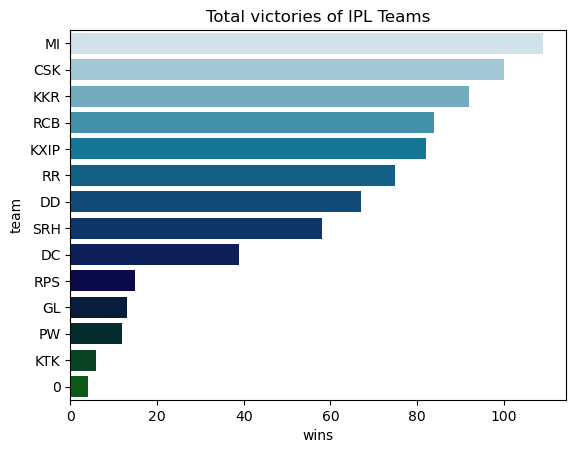

In [78]:
plt.title('Total victories of IPL Teams')
sns.barplot(x='wins', y='team', data =team_wins_df_matches, palette ='ocean_r');

In [82]:
mpv_ser = df_deliveries['player_of_match'].value_counts()

mvp_10_df_deliveries = pd.DataFrame(columns=['player', 'wins'])
count = 0

for items in mpv_ser.iteritems():
    if count > 9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player': [items[0]],
            'wins': [items[1]]
        })
        mvp_10_df_deliveries = mvp_10_df_deliveries.append(temp_df2, ignore_index=True)
        count += 1


In [84]:
mvp_10_df_deliveries

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


<Axes: title={'center': 'Top IPL Player'}, xlabel='wins', ylabel='player'>

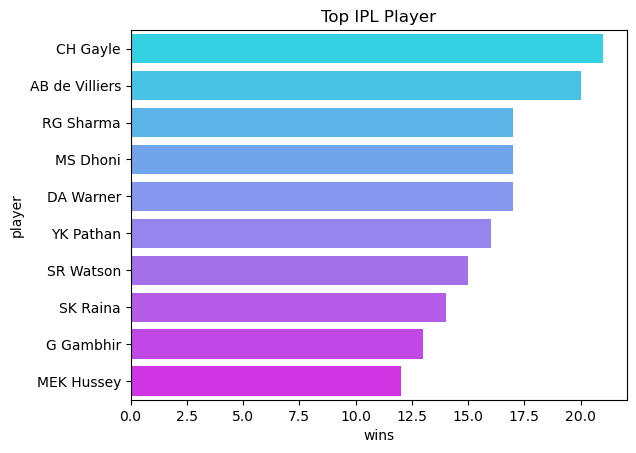

In [92]:
plt.title("Top IPL Player")
sns.barplot(x='wins', y='player', data =mvp_10_df_deliveries, palette ='cool')

# Teams which has won More number of Toss

In [103]:
toss_ser =df_deliveries['toss_winner'].value_counts()
toss_df_deliveries=pd.DataFrame(columns=['team','wins'])

for items in toss_ser.iteritems():
    temp_df3=pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df_deliveries = toss_df_deliveries.append(temp_df3,ignore_index=True)

# Count of Number of toss wins and teams

In [104]:
toss_df_deliveries

,team,wins
0,MI,98
1,KKR,92
2,CSK,89
3,RCB,81
4,KXIP,81
5,DD,80
6,RR,80
7,DC,53
8,SRH,46
9,PW,20


<Axes: title={'center': 'Which team won more number of Toss'}, xlabel='wins', ylabel='team'>

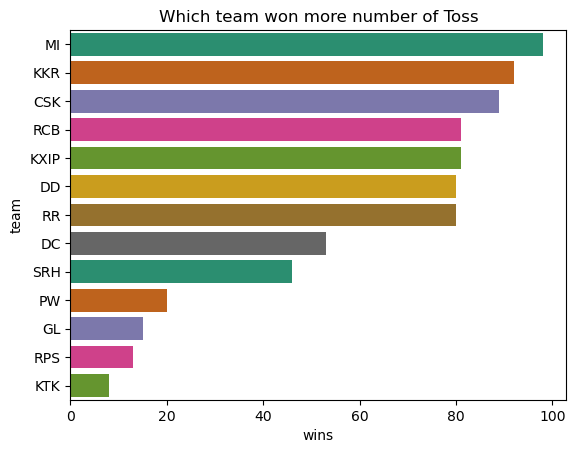

In [105]:
plt.title('Which team won more number of Toss')
sns.barplot(x='wins', y='team', data=toss_df_deliveries, palette='Dark2')

# Numbebr of Matches won by team

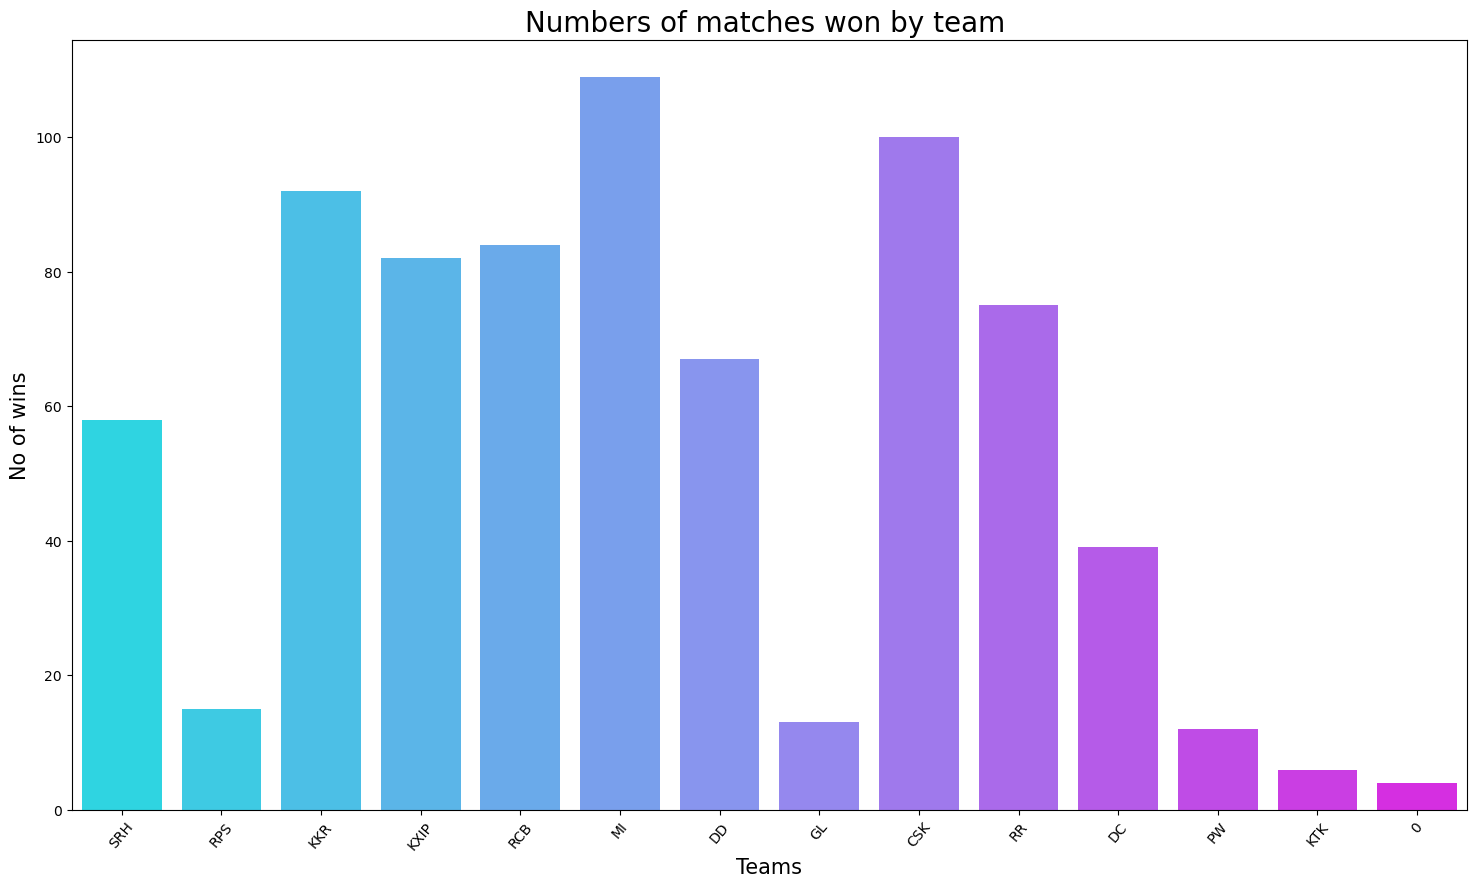

In [107]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=df_deliveries, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [108]:
df_deliveries.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

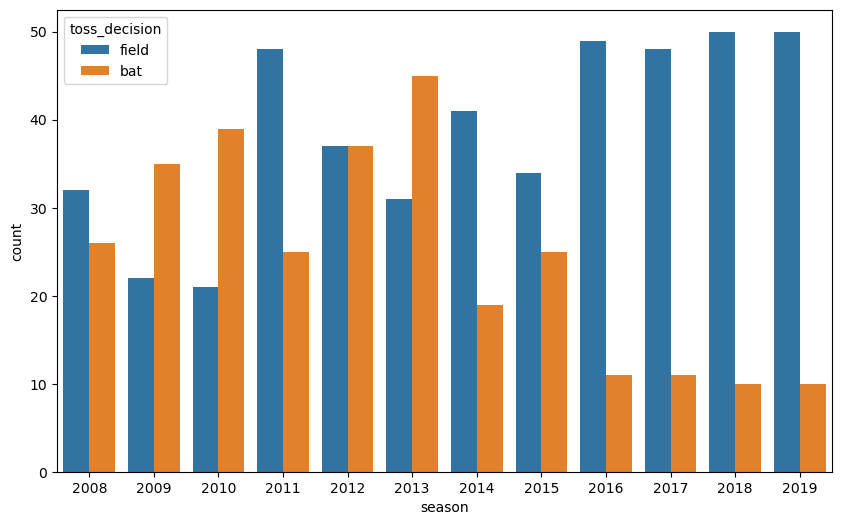

In [109]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season', hue='toss_decision', data=df_deliveries)
plt.show()

# Maximum Toss Winner

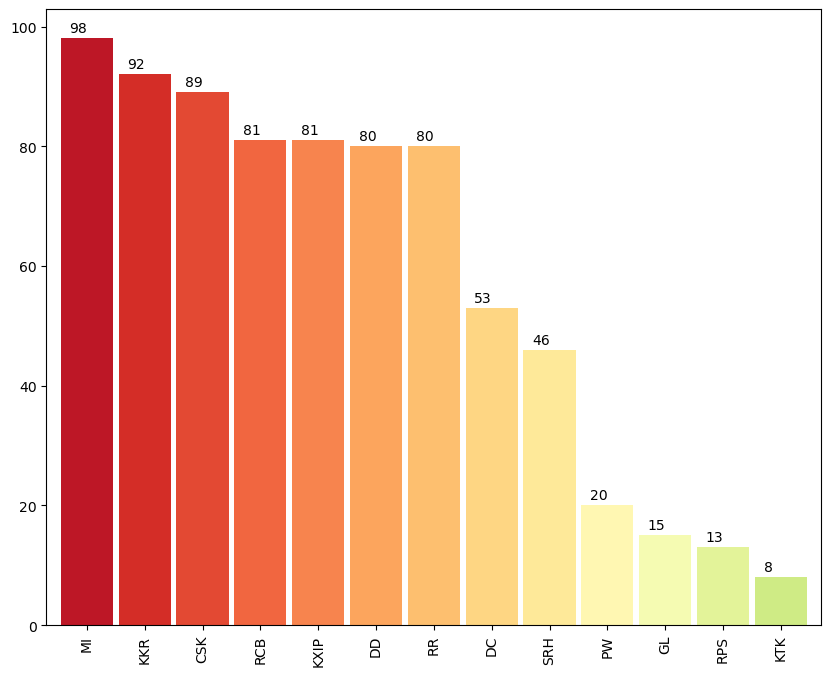

In [111]:
plt.subplots(figsize=(10,8))
ax=df_deliveries['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn', 20))
for p in ax.patches:
          ax.annotate(format(p.get_height()),(p.get_x()+0.15, p.get_height()+1))
plt.show()

# Matches played across each seasons

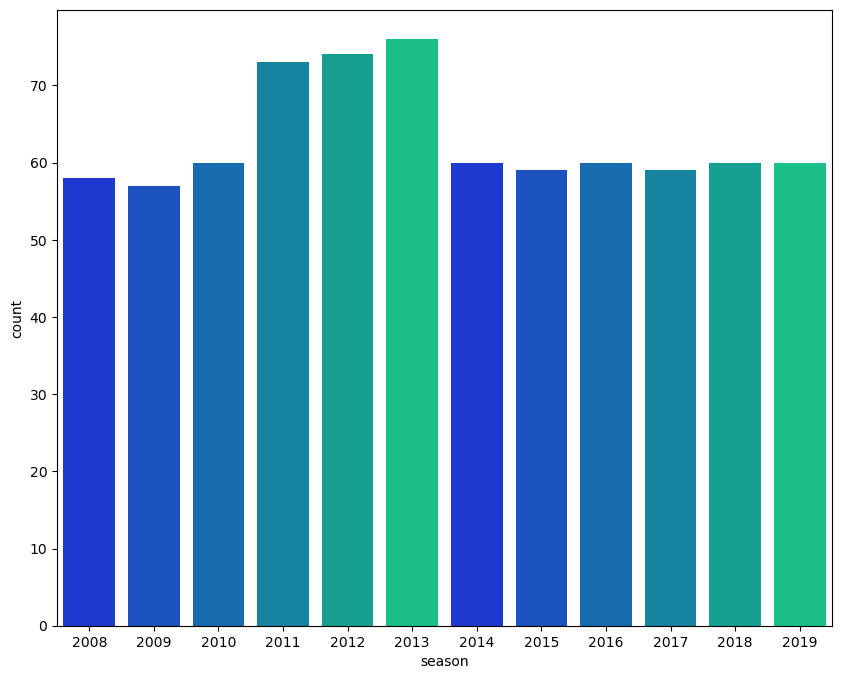

In [112]:
plt.subplots(figsize=(10,8))
sns.countplot(x='season', data=df_deliveries,palette=sns.color_palette('winter'))
plt.show()

# Top 10 Batsman from the dataset

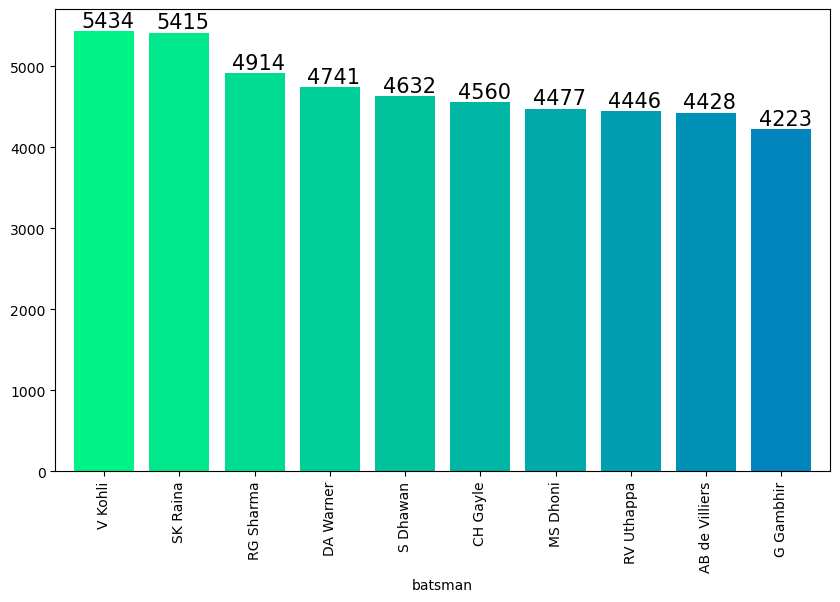

In [113]:
plt.subplots(figsize=(10,6))
max_runs=df_matches.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

# Number of matches won by Toss winning side

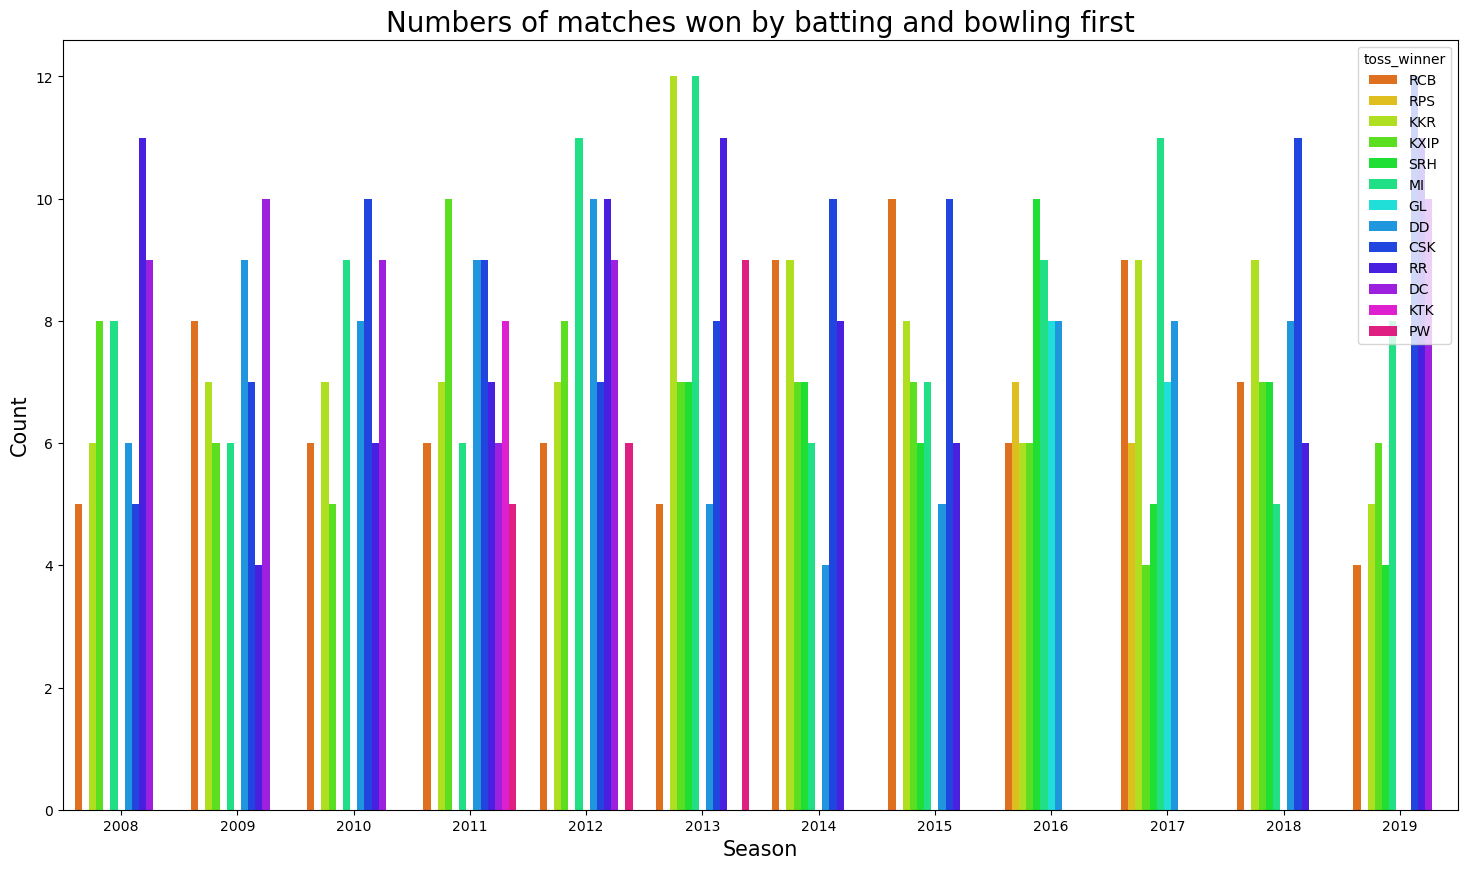

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
sns.countplot(x='season', hue='toss_winner', data=df_deliveries, palette='hsv')
plt.title("Numbers of matches won by batting and bowling first", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


In [118]:
df_deliveries 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,7/5/2019,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,8/5/2019,SRH,DC,DC,field,normal,0,DC,0,2,RR Pant,ACA-VDCA Stadium,0,0
754,11414,2019,Visakhapatnam,10/5/2019,DC,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [122]:
# We will print the winner season-wise
final_matches = df_deliveries.drop_duplicates(subset=['season'], keep='last')

final_matches[['season', 'winner']].reset_index(drop=True).sort_values('season')


,season,winner
1,2008,RR
2,2009,DC
3,2010,CSK
4,2011,CSK
5,2012,KKR
6,2013,MI
7,2014,KKR
8,2015,MI
9,2016,SRH
0,2017,MI


In [123]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

MI     4
CSK    3
KKR    2
RR     1
DC     1
SRH    1
Name: winner, dtype: int64

In [124]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,MI,bat,MI
1,RR,field,RR
2,RCB,field,DC
3,CSK,bat,CSK
4,CSK,bat,CSK
5,CSK,bat,KKR
6,MI,bat,MI
7,KKR,field,KKR
8,CSK,field,MI
9,SRH,bat,SRH


In [125]:
# we will print man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,MI,KH Pandya
1,RR,YK Pathan
2,DC,A Kumble
3,CSK,SK Raina
4,CSK,M Vijay
5,KKR,MS Bisla
6,MI,KA Pollard
7,KKR,MK Pandey
8,MI,RG Sharma
9,SRH,BCJ Cutting


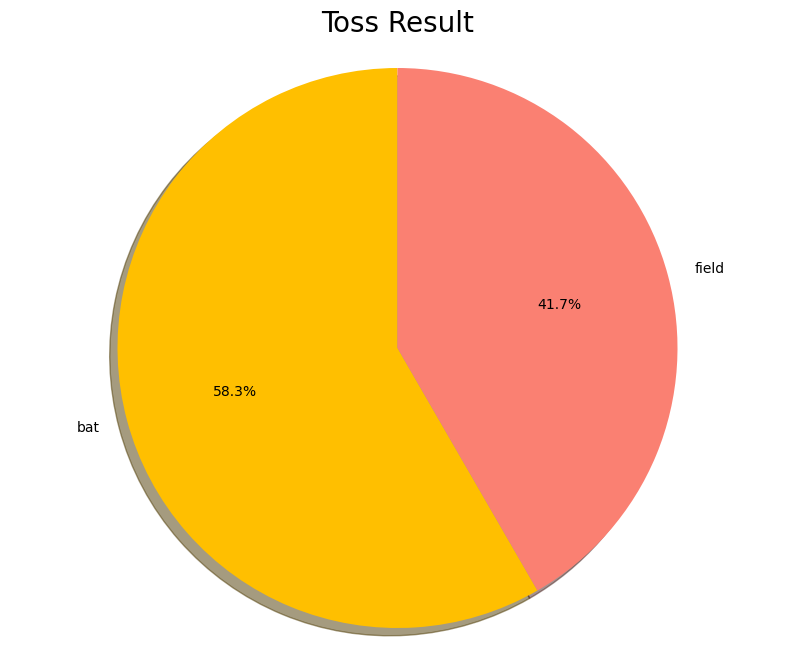

In [128]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result', fontsize=20)
plt.axis('equal')
plt.show()

The highest number of match played in IPL season was 2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.